## **Import Functions**


In [67]:
import math
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

#Define Activation functions
def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=-1, keepdims=True)

def softmax_derivative(x):
    # The derivative of softmax with respect to its input
    s = softmax(x)
    return s * (1 - s)

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred)) / len(y_true)

def pureline(X):
    return X;

def pureline_derivative(X):
    return np.ones_like(X)

# Leaky ReLU Activation Function
def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha, x)

# Derivative of Leaky ReLU Activation Function
def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Activation Function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Hyperbolic Tangent (Tanh) Activation Function
def tanh(x):
    return np.tanh(x)

# Derivative of Tanh Activation Function
def tanh_derivative(x):
    return 1 - tanh(x) ** 2

# Rectified Linear Unit (ReLU) Activation Function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU Activation Function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def pureline(X):
    return X;

def pureline_derivative(X):
    return np.ones_like(X)

def choose_function(x,name):
  if name == "relu":
    return relu(x)
  elif name == "tanh":
    return tanh(x)
  elif name == "sigmoid":
    return sigmoid(x)
  elif name == "leaky_relu":
    return leaky_relu(x)
  elif name == "pureline":
    return pureline(x)

def choose_function_derivate(x,name):
  if name == "relu":
    return relu_derivative(x)
  elif name == "tanh":
    return tanh_derivative(x)
  elif name == "sigmoid":
    return sigmoid_derivative(x)
  elif name == "leaky_relu":
    return leaky_relu_derivative(x)
  elif name == "pureline":
    return pureline_derivative(x)

def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)


def createTimeSeries(data, number_shift):
    time_series_array = np.zeros((data.shape[0] - number_shift + 1, number_shift))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
        for j in range(number_shift):
            time_series_array[i, j] = float(data[i + j])

    return time_series_array

def LoadData(path):
  data = pd.read_excel(path, header=None).to_numpy()
  return data

# normalize the input features
def normalizeData(data):
  min_vals = np.min(data, axis=0)
  max_vals = np.max(data, axis=0)

  normalized_data = (data - min_vals) / (max_vals - min_vals)
  return normalized_data



## **Load Dataset**

In [68]:
file_path = '/content/sample_data/dataset-wine.xlsx'
data = LoadData(file_path)
data = normalizeData(data[:,:-1])
data_target = LoadData(file_path)

## **initialize and Define Variables**

In [69]:
import random
from sklearn.model_selection import train_test_split

num_data = data.shape[0]
percent_train = 0.70
n0 = data.shape[1]

x , y = data[:,:(data.shape[1])] ,data_target[:,-1]
y -= 1
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)
num_classes = len(np.unique(Y_train))

y_one_hot_train = np.zeros((len(Y_train), num_classes))
y_one_hot_train[np.arange(len(Y_train)), (Y_train).astype(int)] = 1

num_train = X_train.shape[0]
num_test = num_data - num_train
listErrorEpoch=[]


n1 = 100
n2 = 60
n3 = 30

n0_perceptron = 30
n1_perceptron = 15
n2_perceptron = num_classes
eta_e=0.01
eta_e1 = 0.03
eta_e2 = 0.04
eta_e3 = 0.05
eta_p = 0.03

epochs = 1000
epochs_ed = 50



## **create layers**

In [70]:
act_functions = ["relu","tanh","sigmoid","leaky_relu","pureline"]

# Initialize Autoencoder weigths
w1_e = np.random.uniform(-1, 1, (n1, n0))
w2_e = np.random.uniform(-1, 1, (n2, n1))
w3_e = np.random.uniform(-1, 1, (n3, n2))
act_func_encoder = "sigmoid"

w1_d = np.random.uniform(-1, 1, (n0, n1))
w2_d = np.random.uniform(-1, 1, (n1, n2))
w3_d = np.random.uniform(-1, 1, (n2, n3))
act_func_decoder = "tanh"


## **FeedForward and BackPropagation Auto Encoder**


In [71]:
# Encoder 1 Local Train
for t in range(epochs_ed):
    error = np.zeros(n0)

    for i in range(num_train):
      # Feedforward
        X = X_train[i]

        # Encoder1
        net1_e = w1_e.dot(X) # n1
        o1_e = choose_function(net1_e,act_func_encoder) # n1

        # Decoder1
        net1_d = w1_d.dot(o1_e) # n0
        o1_d = choose_function(net1_d,act_func_decoder) # n0

      # Backpropagation

        target = np.copy(X) #n0
        error = target - o1_d # n0

        f_derivate_e = choose_function_derivate(net1_e,act_func_encoder) # n1
        f_derivate_e_diag = np.diagflat(f_derivate_e) # n1 * n1

        f_derivate_d = choose_function_derivate(net1_d,act_func_decoder) # n0 * n0
        f_derivate_d_diag = np.diagflat(f_derivate_d) # n0 * n0

        w1_d_old = np.copy(w1_d) # n0 * n1

        # update weights
        w1_d += eta_e1*error.reshape(-1,1).T.dot(f_derivate_d_diag).T.dot(o1_e.reshape(-1,1).T) # n0 * n1
        w1_e += eta_e1*error.reshape(-1,1).T.dot(f_derivate_d_diag).dot(w1_d_old).dot(f_derivate_e_diag).T.dot(X.reshape(-1,1).T) # n1 * n0
        # w1_e = np.copy(w1_d.T)


# Encoder 2 Local Train
for t in range(epochs_ed):
    error = np.zeros(n1)

    for i in range(num_train):
      # Feedforward
        X = X_train[i]

        # Encoder1
        net1_e = w1_e.dot(X) # n1
        o1_e = choose_function(net1_e,act_func_encoder) # n1

        # Encoder2
        net2_e = w2_e.dot(o1_e) # n2
        o2_e = choose_function(net2_e,act_func_encoder) # n2

        # Decoder2
        net2_d = w2_d.dot(o2_e) # n1
        o2_d = choose_function(net2_d,act_func_decoder) # n1

      # Backpropagation

        target = np.copy(o1_e) #n1
        error = target - o2_d # n1

        f_derivate_e = choose_function_derivate(net2_e,act_func_encoder) # n2
        f_derivate_e_diag = np.diagflat(f_derivate_e) # n2 * n2

        f_derivate_d = choose_function_derivate(net2_d,act_func_decoder) # n1 * n1
        f_derivate_d_diag = np.diagflat(f_derivate_d) # n1 * n1

        w2_d_old = np.copy(w2_d) # n1 * n2

        # update weights
        w2_d += eta_e2*error.reshape(-1,1).T.dot(f_derivate_d_diag).T.dot(o2_e.reshape(-1,1).T) # n1 * n2
        w2_e += eta_e2*error.reshape(-1,1).T.dot(f_derivate_d_diag).dot(w2_d_old).dot(f_derivate_e_diag).T.dot(o1_e.reshape(-1,1).T) # n2 * n1
        # w2_e = np.copy(w2_d.T)

# Encoder 3 Local Train
for t in range(epochs_ed):
    error = np.zeros(n2)

    for i in range(num_train):
      # Feedforward
        X = X_train[i]

        # Encoder1
        net1_e = w1_e.dot(X) # n1
        o1_e = choose_function(net1_e,act_func_encoder) # n1

        # Encoder2
        net2_e = w2_e.dot(o1_e) # n2
        o2_e = choose_function(net2_e,act_func_encoder) # n2

        # Encoder3
        net3_e = w3_e.dot(o2_e) # n3
        o3_e = choose_function(net3_e,act_func_encoder) # n3

        # Decoder3
        net3_d = w3_d.dot(o3_e) # n2
        o3_d = choose_function(net3_d,act_func_decoder) # n2

      # Backpropagation

        target = np.copy(o2_e) #n2
        error = target - o3_d # n2

        f_derivate_e = choose_function_derivate(net3_e,act_func_encoder) # n3
        f_derivate_e_diag = np.diagflat(f_derivate_e) # n3 * n3

        f_derivate_d = choose_function_derivate(net3_d,act_func_decoder) # n2 * n2
        f_derivate_d_diag = np.diagflat(f_derivate_d) # n2 * n2

        w3_d_old = np.copy(w3_d) # n2 * n3

        # update weights
        w3_d += eta_e3*error.reshape(-1,1).T.dot(f_derivate_d_diag).T.dot(o3_e.reshape(-1,1).T) # n2 * n3
        w3_e += eta_e3*error.reshape(-1,1).T.dot(f_derivate_d_diag).dot(w3_d_old).dot(f_derivate_e_diag).T.dot(o2_e.reshape(-1,1).T) # n3 * n2
        # w3_e = np.copy(w3_d.T)


## **Create Layer Perceptron**

In [72]:
act_functions = ["relu","tanh","sigmoid","leaky_relu","pureline","softmax"]

# Initialize Perceptron weigths
w1_p = np.random.uniform(-1, 1, (n1_perceptron, n0_perceptron))
act_layer1_p = "sigmoid"

w2_p = np.random.uniform(-1, 1, (n2_perceptron, n1_perceptron))
act_layer2_p = "softmax"


## **FeedForward and BackPropagation Perceptron**


In [73]:
for t in range(epochs):
    error = np.zeros(n2_perceptron)
    total_loss = 0
    total_error = 0
    for i in range(num_train):
      # Feedforward
        X = X_train[i]

        # Encoder1
        net1_e = w1_e.dot(X) # n1
        o1_e = choose_function(net1_e,act_func_encoder) # n1

        # Encoder2
        net2_e = w2_e.dot(o1_e) # n2
        o2_e = choose_function(net2_e,act_func_encoder) # n2

        # Encoder3
        net3_e = w3_e.dot(o2_e) # n3
        o3_e = choose_function(net3_e,act_func_encoder) # n3

        # layer 1 Perceptron
        net1_p = w1_p.dot(o3_e) # n1_p
        o1_p = choose_function(net1_p,act_layer1_p) # n1_p

        # layer 2 Perceptron
        net2_p = w2_p.dot(o1_p) # n2_p
        o2_p = softmax(net2_p)

      # Backpropagation
         # Calculate cross-entropy loss
        target = y_one_hot_train[i]
        loss = cross_entropy_loss(target, o2_p)
        total_loss += loss

        target = np.copy(y_one_hot_train[i]) # n2_p
        error = target - o2_p # n2_p

        f_derivate_p1_diag = np.diagflat(choose_function_derivate(net1_p,act_layer1_p)) # n1_p * n1_p
        f_derivate_p2_diag = np.diagflat(softmax_derivative(net2_p)) # n2_p * n2_p

        f_derivate_e1_diag = np.diagflat(choose_function_derivate(net1_e,act_func_encoder)) # n1 * n1
        f_derivate_e2_diag = np.diagflat(choose_function_derivate(net2_e,act_func_encoder)) # n2 * n2
        f_derivate_e3_diag = np.diagflat(choose_function_derivate(net3_e,act_func_encoder)) # n3 * n3

        w2_p_old = np.copy(w2_p) # n2_p * n1_p
        w1_p_old = np.copy(w1_p) # n2_p * n1_p
        w3_e_old = np.copy(w3_e) # n3 * n2
        w2_e_old = np.copy(w2_e) # n2 * n1


        # update weights perceptron
        w2_p += eta_p * error.reshape(-1,1).T.dot(f_derivate_p2_diag).T.dot(o1_p.reshape(-1,1).T) # n2_p * n1_p
        w1_p += eta_p * error.reshape(-1,1).T.dot(f_derivate_p2_diag).dot(w2_p_old).dot(f_derivate_p1_diag).T.dot(o3_e.reshape(-1,1).T) # n1_p * n0_p

        # update weights Encoder

        w3_e += eta_p * error.reshape(-1,1).T.dot(f_derivate_p2_diag).dot(w2_p_old).dot(f_derivate_p1_diag).dot(w1_p_old).dot(f_derivate_e3_diag).T.dot(o2_e.reshape(-1,1).T) # n3 * n2
        w2_e += eta_p * error.reshape(-1,1).T.dot(f_derivate_p2_diag).dot(w2_p_old).dot(f_derivate_p1_diag).dot(w1_p_old).dot(f_derivate_e3_diag).dot(w3_e_old).dot(f_derivate_e2_diag).T.dot(o1_e.reshape(-1,1).T) # n2 * n1
        w1_e += eta_p * error.reshape(-1,1).T.dot(f_derivate_p2_diag).dot(w2_p_old).dot(f_derivate_p1_diag).dot(w1_p_old).dot(f_derivate_e3_diag).dot(w3_e_old).dot(f_derivate_e2_diag).dot(w2_e_old).dot(f_derivate_e1_diag).T.dot(X.reshape(-1,1).T) # n1 * n0

        total_error += np.abs(error)

    if t % 100 == 0 or t == epochs-1:
      print(f"Epoch {t}: Total Loss = {total_loss}")

    listErrorEpoch.append(total_error)

print("Training completed")


Epoch 0: Total Loss = 61.130728653452735
Epoch 100: Total Loss = 24.075024393365037
Epoch 200: Total Loss = 3.3854748155170253
Epoch 300: Total Loss = 1.6016166727759875
Epoch 400: Total Loss = 1.0922119942285136
Epoch 500: Total Loss = 0.8612886203156486
Epoch 600: Total Loss = 0.7275671014794283
Epoch 700: Total Loss = 0.6388802948245931
Epoch 800: Total Loss = 0.5749373080709562
Epoch 900: Total Loss = 0.5261812566438628
Epoch 999: Total Loss = 0.48784052876060907
Training completed


## **Evaluate Test data**

In [74]:
X = X_test

# Encoder1
net1_e = X.dot(w1_e.T) # n1
o1_e = choose_function(net1_e,act_func_encoder) # n1

# Encoder2
net2_e = o1_e.dot(w2_e.T)  # n2
o2_e = choose_function(net2_e,act_func_encoder) # n2

# Encoder3
net3_e = o2_e.dot(w3_e.T) # n3
o3_e = choose_function(net3_e,act_func_encoder) # n3

# layer 1 Perceptron
net1_p = o3_e.dot(w1_p.T) # n1_p
o1_p = choose_function(net1_p,act_layer1_p) # n1_p

# layer 2 Perceptron
net2_p = o1_p.dot(w2_p.T) # n2_p
o2_p = softmax(net2_p)
predicted_labels = np.argmax(o2_p, axis=1)
print("Actual values : ")
print(Y_test)
print("\nPridected values : ")
print(predicted_labels)
# Calculate the accuracy
accuracy = np.mean(predicted_labels == Y_test)
print(f"\nAccuracy on the test set: {accuracy * 100}%")

Actual values : 
[0. 0. 2. 0. 1. 0. 1. 2. 1. 2. 0. 2. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 2.
 2. 2. 1. 1. 1. 0. 0. 1. 2. 0. 0. 0. 2. 2. 1. 2. 0. 1. 1. 1. 2. 0. 1. 1.
 2. 0. 1. 0. 0. 2.]

Pridected values : 
[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 0 2 0 1 1 2 0 1 0 0 2]

Accuracy on the test set: 98.14814814814815%


## **Confiusion Matrix**

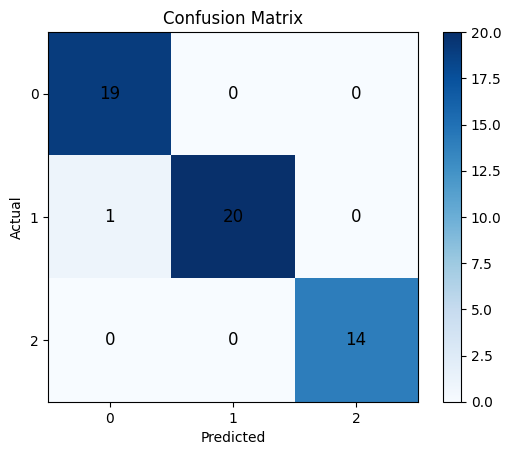

In [75]:
import numpy as np
import matplotlib.pyplot as plt

predicted_classes = predicted_labels
actual_classes = Y_test

confusion_matrix = np.zeros((num_classes, num_classes))

for actual, predicted in zip(actual_classes, predicted_classes):
    confusion_matrix[int(actual)][predicted] += 1

# Plot the confusion matrix
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Annotate the plot with numbers
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(int(confusion_matrix[i, j])), fontsize=12, ha='center', va='center')  # Corrected

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(num_classes))
plt.yticks(np.arange(num_classes))

plt.show()



## **Confiusion Matrix (Percent)**

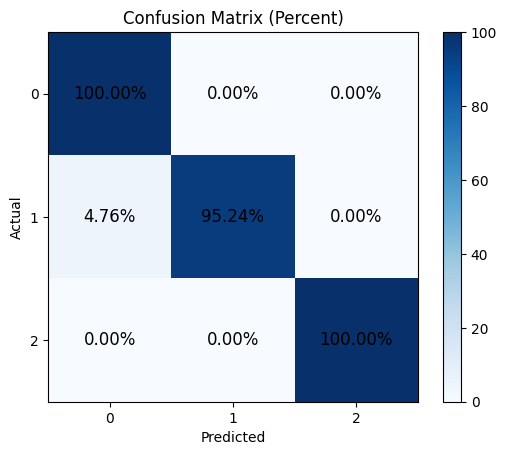

In [76]:
import numpy as np
import matplotlib.pyplot as plt

predicted_classes = predicted_labels
actual_classes = Y_test

num_classes = num_classes

confusion_matrix = np.zeros((num_classes, num_classes))

for actual, predicted in zip(actual_classes, predicted_classes):
    confusion_matrix[int(actual)][predicted] += 1

confusion_matrix_percent = confusion_matrix / confusion_matrix.sum(axis=1, keepdims=True) * 100

plt.imshow(confusion_matrix_percent, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Percent)')
plt.colorbar()

for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, f"{confusion_matrix_percent[i, j]:.2f}%", fontsize=12, ha='center', va='center')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(num_classes))
plt.yticks(np.arange(num_classes))

plt.show()


## **Error of Class**

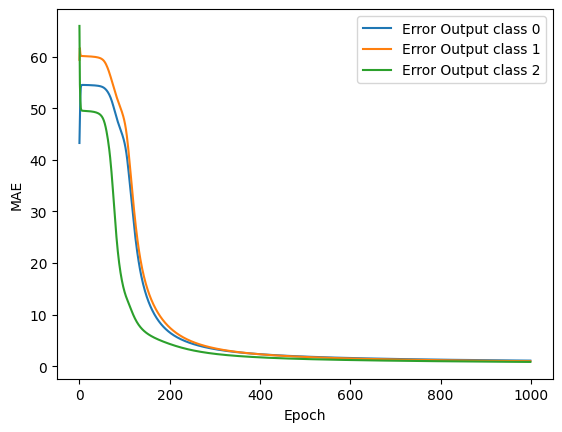

In [77]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array(listErrorEpoch)
curve = np.zeros((num_classes,data.shape[0]))
x_values = range(len(data))

for i in range(num_classes):
  curve[i] = data[:, i]



for i in range(num_classes):
  plt.plot(x_values, curve[i], label=f'Error Output class {i}')
  plt.xlabel('Epoch')
  plt.ylabel('MAE')
  plt.legend()

plt.show()
